# Neural Quest Assignment-1
*  In this assignment, we will build a classifier for MNIST from scratch using just [NumPy](https://numpy.org/)

*  [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits of size 28x28

*  The dataset that you are expected to use for training can be found [here](https://drive.google.com/file/d/1DF-OWSP803x34FrvaJ4XeDm_QZUevu32/view?usp=sharing)

*   Our model will have 1 hidden layer, like the one below (not our recommendation to use 256 in the hidden layer though, try various values out)

**Feel free to redefine any function signatures below, just make sure the final cell remains the same.**

<center>
<img src="https://user-images.githubusercontent.com/81357954/166119893-4ca347b8-b1a4-40b8-9e0a-2e92b5f164ae.png">
</center>

## Import libraries here
NumPy, Matplotlib, ...

Also remember to initialize the seed for reproducibility of results

In [1]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Load *Dataset*
Load data from the given pickle file

In [2]:
# mount Google Drive to access the dataset
from sklearn import preprocessing
# load the data set
file = 'train_data.pkl'
with open(file,'rb') as data:
    training_data = pickle.load(data)

X = training_data['X']
y = training_data['y']

# normalize
X = preprocessing.normalize(X)

# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.85)
# print(X_train.shape)
# print(y_train.shape)


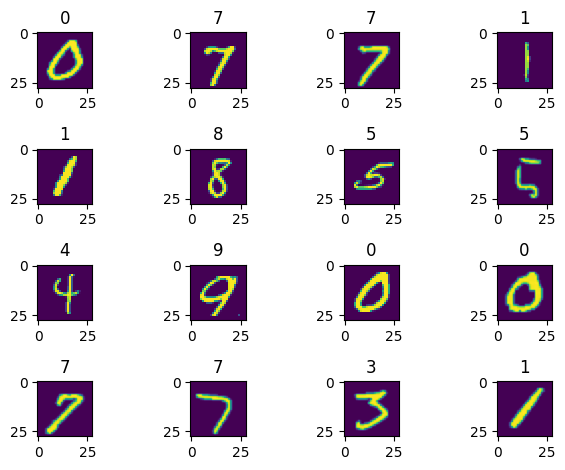

In [3]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels
size=X.shape[0]
for i in range(16):
    plt.subplot(4,4,i+1)
    j = np.random.randint(size)
    plt.imshow(X[j].reshape(28,28))
    plt.title(y[j][0])
plt.tight_layout()

## Building up parts of our classifier

**Activation functions**

In [4]:
def relu(z):
    """
    Arguments:
    z -- A scalar or numpy array.
    Return:
    relu func applied to each element of z
    """
    return np.maximum(0,z)

def softmax(z):
    """
    returns computed probabilitites for each element in batch separately
    input: (N, 10)
    output: (N, 10)
    """
    z=np.exp(z)
    z=z/np.sum(z, axis=1, keepdims = True)
    return z

**Initialize the layers weights**

Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero. But you can try everything out :)

In [5]:
def init_params(layer_0,layer_1,layer_2):
    """
    ideally it should take the size of all the layers and 
    should return the initialized weights.
    """
    w1 = 0.01 * np.random.randn(layer_0, layer_1)
    b1 = np.zeros((layer_1,1))
    w2 = 0.01 * np.random.randn(layer_1, layer_2)
    b2 = np.zeros((layer_2,1))
    return (w1,b1,w2,b2)
    

**Notes about the Neural Network** 
*   Input size is (784,) because 28x28 = 784
*   Output size will be 10, each element represeting probability of the image representing that digit
*   Size of the hidden layer is a hyperparameter



**Forward Propagation**

In [6]:
def forward_propg(X, weights):
    """
    X: input data
    returns: logits, output of each layer z1,z2,a1,a2
    """
    w1,b1,w2,b2 = weights
    z1 = np.dot(X, w1) + b1.transpose()
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2.transpose()
    a2 = softmax(z2)
    return (z1,a1,z2,a2)


**Backward Propagation**


You may use stochastic gradient descent or batch gradient descent here. Feel free to use any loss function.

In [1]:
def backward_propg(weights, X, y, forward_output):
    """
    should update the weights and return updated weights
    """
    z1,a1,z2,a2 = forward_output
    w1,b1,w2,b2 = weights
    temp = a2
    temp[np.arange(temp.shape[0]),y.transpose()]-=1
    dz2 = -temp * a2[np.arange(len(a2)),y.flatten()].reshape(a2.shape[0],1) 
    da2 = np.zeros(a2.shape)
    for i in range(X.shape[0]):
      if a2[i][y[i][0]] != 0:
        da2[i][y[i][0]] = -1.0/(a2[i][y[i][0]]*X.shape[0])
    temp = da2[np.arange(len(da2)),y.flatten()].reshape(da2.shape[0],1)
    dz2 = dz2 * temp
    dw2 = np.dot(a1.T, dz2)
    db2 = np.transpose(np.sum(dz2, axis=0, keepdims = True))
    da1 = np.dot(dz2, w2.T)
    dz1 = da1*(z1>0) 
    dw1 = np.dot(X.T, dz1)
    db1 = np.transpose(np.sum(dz1, axis=0, keepdims = True))
    w1-=dw1
    w2-=dw2
    b1-=db1
    b2-=db2

    
    return (w1,b1,w2,b2)

In [8]:
def cost_func(a2,y,params):
    """
    calculate loss to check whether it is decreasing at each epoch or not
    one can return this in backward propagation as well
    """
    loss = - np.log(a2)
    return np.sum(loss[np.arange(len(loss)),y.flatten()])/y.shape[0]


## Integrate everything

In [9]:
def train(X, y, hidden_nodes, epochs=1000, lr=1e-5):
    """
    hidden_nodes: no. of nodes in hidden layer

    should return the updated optimize weights.
    """
    # initialize weights.
    weights=init_params(784,hidden_nodes,10)

    for i in range(epochs):
        # forward propagation
        z1,a1,z2,a2 = forward_propg(X,weights)

        # print cost at every 100 or so iterations
        cost_i=cost_func(a2,y,weights)
        if i%100 == 0 and i > 0:
            print(i,end=" ")
            print("iteration =>",end = " ")
            print(cost_i)
            
        if i == 999:
            print(i+1,end=" ")
            print("iteration =>",end = " ")
            print(cost_i)
        # backward propagation
        weights = backward_propg(weights, X, y, (z1,a1,z2,a2))
    return weights

In [10]:
def predict(X, updated_weights):
    """
    returns the prediction in [0,9] for each element in X
    """
    z1,a1,z2,a2 = forward_propg(X,updated_weights)
    result = np.argmax(a2,axis=1)
    return result.reshape(result.shape[0],1)

In [11]:
def accuracy(predictions, y):
    """
    prints % accuracy
    """
    result = np.mean(predictions == y)
    print("Accuracy:",result*100)
    return

In [40]:
parameters = train(X_train, y_train, 256)

100 iteration => 1.0373114667637646
200 iteration => 0.5028987893445027
300 iteration => 0.3869834968940054
400 iteration => 0.3373699507657904
500 iteration => 0.30791001842613586
600 iteration => 0.2869519321943709
700 iteration => 0.2704305351948852
800 iteration => 0.25663251256448955
900 iteration => 0.2445498964212652
1000 iteration => 0.2337270100542499


In [41]:
print("Train cases",end = " ")
accuracy(predict(X_train, parameters),y_train)
print("Test cases",end = " ")
accuracy(predict(X_test, parameters),y_test)


Train cases Accuracy: 93.36666666666666
Test cases Accuracy: 91.47843137254903


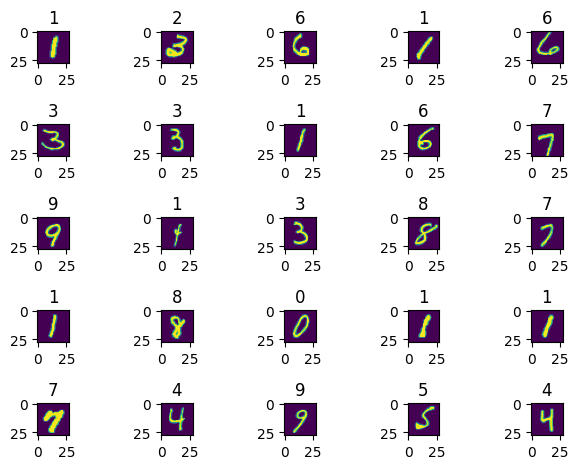

In [58]:
Ypred = predict(X_test, parameters)
size=X_test.shape[0]
for i in range(25):
    plt.subplot(5,5,i+1)
    j = np.random.randint(size)
    plt.imshow(X_test[j].reshape(28,28))
    plt.title(Ypred[j][0])
plt.tight_layout()

In [53]:
w1,b1,w2,b2 = parameters
print(w1.shape)
print(b1.shape)
print(w2.shape)
print(b2.shape)

(784, 256)
(256, 1)
(256, 10)
(10, 1)


### Save as pickle

In [57]:
import pickle
import random
from google.colab import files

roll_num = "210050117" # enter ldap
hidden_dim = 256 # replace with your own hidden dimension

model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': w1, # layer 0 weight (784, z)
    'layer_0_bias': b1, # layer 0 bias (z, 1)
    'layer_1_wt': w2, # layer 1 weight (z, 10)
    'layer_1_bias': b2 # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)
    files.download(f'model_{roll_num}.pkl') # download the file from the Colab session for submission

ModuleNotFoundError: No module named 'google.colab'